<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/transformer_pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt


Epoch: 1, Loss: 7.352832317352295, Accuracy: 0.0
Epoch: 4, Loss: 1.2154226303100586, Accuracy: 0.25
Epoch: 7, Loss: 0.6063327789306641, Accuracy: 0.5
Epoch: 10, Loss: 0.27110421657562256, Accuracy: 0.5


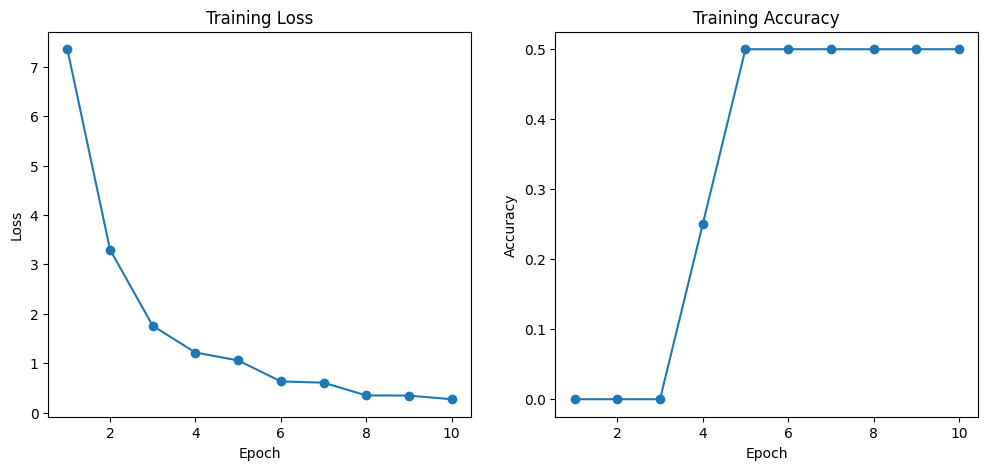

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.ReLU(),
            nn.Linear(dim_feedforward, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, _ = self.attn(x, x, x)
        x = x + self.dropout(attn_output)
        x = self.norm1(x)
        ff = self.feed_forward(x)
        x = x + self.dropout(ff)
        x = self.norm2(x)
        return x

class Transformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dim_feedforward, dropout=0.1):
        super(Transformer, self).__init__()
        self.encoder_layers = nn.ModuleList([
            TransformerBlock(d_model, nhead, dim_feedforward, dropout) for _ in range(num_layers)
        ])
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        for layer in self.encoder_layers:
            x = layer(x)
        x = self.fc(x)
        return x

# Define the model
d_model = 8
nhead = 2
num_layers = 2
dim_feedforward = 32
dropout = 0.1

model = Transformer(d_model, nhead, num_layers, dim_feedforward, dropout)

# Define the input and target data
# Input shape should be (seq_length, batch_size, d_model)
input_data = torch.tensor([
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]],
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]]
], dtype=torch.float32).permute(1, 0, 2)  # Shape: (2, 2, 8)
target_data = torch.tensor([[2], [3]], dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store loss and accuracy values
loss_values = []
accuracy_values = []

# Train the model
for epoch in range(10):
    model.train()
    optimizer.zero_grad()
    output = model(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    # Calculate accuracy based on a threshold
    threshold = 0.5
    correct_predictions = ((output - target_data).abs() < threshold).float().mean().item()
    accuracy_values.append(correct_predictions)

    if epoch % 3 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item()}, Accuracy: {correct_predictions}')

# Plotting loss and accuracy
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, '-o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, '-o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


In [13]:
#Tensor flow version

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.4700
Epoch 2/10
1/1 [==============================] - 0s 50ms/step - loss: 2.5617
Epoch 3/10
1/1 [==============================] - 0s 46ms/step - loss: 0.3828
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 0.5952
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 0.3782
Epoch 6/10
1/1 [==============================] - 0s 49ms/step - loss: 0.4390
Epoch 7/10
1/1 [==============================] - 0s 47ms/step - loss: 0.3061
Epoch 8/10
1/1 [==============================] - 0s 46ms/step - loss: 0.2976
Epoch 9/10
1/1 [==============================] - 0s 47ms/step - loss: 0.3012
Epoch 10/10
1/1 [==============================] - 0s 48ms/step - loss: 0.3524


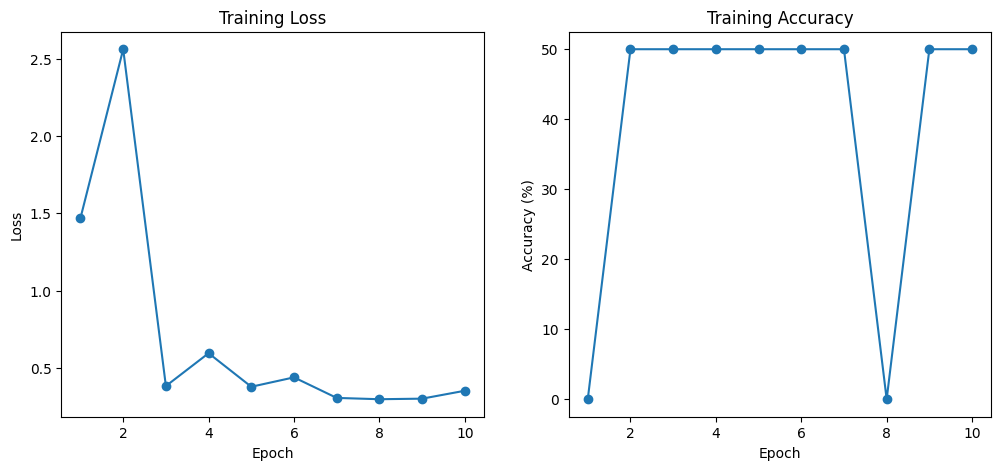

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),  # Feed-forward network
            tf.keras.layers.Dense(d_model)  # Projection back to d_model
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x, training):
        attn_output = self.att(x, x, x)  # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # Add & Norm

        ffn_output = self.ffn(out1)  # Feed-forward network
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Add & Norm

class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, dropout_rate=0.1):
        super(Transformer, self).__init__()
        self.encoder_layers = [TransformerBlock(d_model, num_heads, dff, dropout_rate) for _ in range(num_layers)]
        self.final_layer = tf.keras.layers.Dense(1)  # Final output layer

    def call(self, x, training):
        for layer in self.encoder_layers:
            x = layer(x, training)  # Pass through each Transformer block
        return self.final_layer(x)  # Final projection

# Define model parameters
d_model = 8
num_heads = 2
num_layers = 2
dff = 32
dropout_rate = 0.1

# Initialize the model
model = Transformer(num_layers, d_model, num_heads, dff, dropout_rate)

# Define the input and target data
input_data = tf.constant([
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]],
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]]
], dtype=tf.float32)  # Shape: (2, 2, 8)
target_data = tf.constant([[2], [3]], dtype=tf.float32)  # Shape: (2, 1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError())

# Training loop with custom metrics for loss and accuracy
class CustomTraining(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []
        self.accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.losses.append(loss)

        # Calculate accuracy based on a threshold and normalize to percentage
        predictions = self.model(input_data, training=False)
        threshold = 0.5
        correct_predictions = tf.reduce_mean(tf.cast(tf.abs(predictions - target_data) < threshold, tf.float32)).numpy() * 100
        self.accuracies.append(correct_predictions)

        if (epoch + 1) % 3 == 0:
            print(f'Epoch: {epoch+1}, Loss: {loss}, Accuracy: {correct_predictions:.2f}%')

# Fit the model
callback = CustomTraining()
model.fit(input_data, target_data, epochs=10, callbacks=[callback])

# Plotting loss and accuracy
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, callback.losses, '-o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, callback.accuracies, '-o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.show()
